# Preprocess  Snopes dataset 

Snopes is a well-known fact checking website that validates Internet rumors, e-mail forwards, 
hoaxes, urban legends, and other stories of unknown or questionable origin. They typically 
collect these rumors and claims from social media, news websites, e-mails by users, etc. 
Each website article verifies a single claim, e.g., “Clown masks have been banned
in the United States, and wearing one can result in a $50,000 fine." 

The Snopes editors assign a manual credibility verdict to each such claim: True or False. 
Few of the claims have labels like Mostly True or Mostly False. We map Mostly True labels to True,
and Mostly False labels to False — thereby considering only binary credibility labels for this work. 
Claims having labels like Partially True or Partially False are ignored. 

To retrieve the reporting articles for each claim, we issue each claim as a query 
to a search engine and retrieve the top 30 search results with their respective web sources. 

## The statistics of the dataset is as following: 
 
- Claims				4341 
	- True Claims	1164
	- False Claims	3177
- Claim Sources		

- Articles			29242
- Article sources	336

## The structure of the snopes.tsv file is following:
- cred_label : credibility of the claim (True/False)
- claim_id :  uniq identifier of the claim
- claim_text : text of the claim
- evidence : relevant snippet from the evidence article
- evidence_source : source of the evidence article

## Importing packages 

In [1]:
import pandas as pd
import os.path as op
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = '../../Data'

In [3]:
# Load train data
train = pd.read_csv(op.join(DATA_DIR, 'Snopes/Unprocessed_data/snopes.csv'), header=None)
train

0                           1  \
0      true  politics_christmas_bestbuy   
1      true  politics_christmas_bestbuy   
2      true  politics_christmas_bestbuy   
3      true  politics_christmas_bestbuy   
4      true  politics_christmas_bestbuy   
...     ...                         ...   
29237  true    medical_emergent_stapled   
29238  true    medical_emergent_stapled   
29239  true    medical_emergent_stapled   
29240  true    medical_emergent_stapled   
29241  true    medical_emergent_stapled   

                                                       2  \
0      best buy chain eschewing use word christmas 20...   
1      best buy chain eschewing use word christmas 20...   
2      best buy chain eschewing use word christmas 20...   
3      best buy chain eschewing use word christmas 20...   
4      best buy chain eschewing use word christmas 20...   
...                                                  ...   
29237  worker tore scrotum piece machinery stapled ba...   
29238  worker tore scrotum piece machinery stapled ba...   
29239  worker tore scrotum piece machinery stapled ba...   
29240  worker tore scrotum piece machinery stapled ba...   
29241  worker tore scrotum piece machinery stapled ba...   

                                                       3  \
0      there are several holidays throughout that tim...   
1      defenses against same photographs show images ...   
2      the best that life could think out we extended...   
3      this entry november 19 2006 published 9 years ...   
4      place he will not do either said snape the ord...   
...                                                  ...   
29237  united nations vaccines vineyard virtual reali...   
29238  fri dont count your chickens baby fri my compu...   
29239  fly because the courts believed that flying wi...   
29240  musical acts declined to perform in florida ov...   
29241  of them banded testicles human tumblr going de...   

                                4  
0      www.godlikeproductions.com  
1                   www.sjpba.net  
2               www.englisher.net  
3                        rss2.com  
4               www.englisher.net  
...                           ...  
29237        hoax.trendolizer.com  
29238                    wfmu.org  
29239                  bloooo.com  
29240               www.sjpba.net  
29241               lucim.noip.us  

[29242 rows x 5 columns]

## Naming the columns 

In [4]:
train.columns = ['label', 'title','text','source_text','source']

In [5]:
train

label                       title  \
0      true  politics_christmas_bestbuy   
1      true  politics_christmas_bestbuy   
2      true  politics_christmas_bestbuy   
3      true  politics_christmas_bestbuy   
4      true  politics_christmas_bestbuy   
...     ...                         ...   
29237  true    medical_emergent_stapled   
29238  true    medical_emergent_stapled   
29239  true    medical_emergent_stapled   
29240  true    medical_emergent_stapled   
29241  true    medical_emergent_stapled   

                                                    text  \
0      best buy chain eschewing use word christmas 20...   
1      best buy chain eschewing use word christmas 20...   
2      best buy chain eschewing use word christmas 20...   
3      best buy chain eschewing use word christmas 20...   
4      best buy chain eschewing use word christmas 20...   
...                                                  ...   
29237  worker tore scrotum piece machinery stapled ba...   
29238  worker tore scrotum piece machinery stapled ba...   
29239  worker tore scrotum piece machinery stapled ba...   
29240  worker tore scrotum piece machinery stapled ba...   
29241  worker tore scrotum piece machinery stapled ba...   

                                             source_text  \
0      there are several holidays throughout that tim...   
1      defenses against same photographs show images ...   
2      the best that life could think out we extended...   
3      this entry november 19 2006 published 9 years ...   
4      place he will not do either said snape the ord...   
...                                                  ...   
29237  united nations vaccines vineyard virtual reali...   
29238  fri dont count your chickens baby fri my compu...   
29239  fly because the courts believed that flying wi...   
29240  musical acts declined to perform in florida ov...   
29241  of them banded testicles human tumblr going de...   

                           source  
0      www.godlikeproductions.com  
1                   www.sjpba.net  
2               www.englisher.net  
3                        rss2.com  
4               www.englisher.net  
...                           ...  
29237        hoax.trendolizer.com  
29238                    wfmu.org  
29239                  bloooo.com  
29240               www.sjpba.net  
29241               lucim.noip.us  

[29242 rows x 5 columns]

## Deal with null values 

In [6]:
train.isnull().sum()

label          0
title          0
text           0
source_text    0
source         0
dtype: int64

## Deal with the labels 

In [7]:
train['label'].value_counts()

false           21256
true             7363
mostly false      479
mostly true       144
Name: label, dtype: int64

### We will consider "mostly false" as "false" and "mostly true" as "true"

In [8]:
train["label"].replace({"true": "0", "false": "1","mostly true": "0","mostly false": "1"}, inplace=True)
train

label                       title  \
0         0  politics_christmas_bestbuy   
1         0  politics_christmas_bestbuy   
2         0  politics_christmas_bestbuy   
3         0  politics_christmas_bestbuy   
4         0  politics_christmas_bestbuy   
...     ...                         ...   
29237     0    medical_emergent_stapled   
29238     0    medical_emergent_stapled   
29239     0    medical_emergent_stapled   
29240     0    medical_emergent_stapled   
29241     0    medical_emergent_stapled   

                                                    text  \
0      best buy chain eschewing use word christmas 20...   
1      best buy chain eschewing use word christmas 20...   
2      best buy chain eschewing use word christmas 20...   
3      best buy chain eschewing use word christmas 20...   
4      best buy chain eschewing use word christmas 20...   
...                                                  ...   
29237  worker tore scrotum piece machinery stapled ba...   
29238  worker tore scrotum piece machinery stapled ba...   
29239  worker tore scrotum piece machinery stapled ba...   
29240  worker tore scrotum piece machinery stapled ba...   
29241  worker tore scrotum piece machinery stapled ba...   

                                             source_text  \
0      there are several holidays throughout that tim...   
1      defenses against same photographs show images ...   
2      the best that life could think out we extended...   
3      this entry november 19 2006 published 9 years ...   
4      place he will not do either said snape the ord...   
...                                                  ...   
29237  united nations vaccines vineyard virtual reali...   
29238  fri dont count your chickens baby fri my compu...   
29239  fly because the courts believed that flying wi...   
29240  musical acts declined to perform in florida ov...   
29241  of them banded testicles human tumblr going de...   

                           source  
0      www.godlikeproductions.com  
1                   www.sjpba.net  
2               www.englisher.net  
3                        rss2.com  
4               www.englisher.net  
...                           ...  
29237        hoax.trendolizer.com  
29238                    wfmu.org  
29239                  bloooo.com  
29240               www.sjpba.net  
29241               lucim.noip.us  

[29242 rows x 5 columns]

In [9]:
train['label'].value_counts()

1    21735
0     7507
Name: label, dtype: int64

## Change the type of the label column 

In [10]:
train['label']=train['label'].astype(np.int64)

In [11]:
train.dtypes

label           int64
title          object
text           object
source_text    object
source         object
dtype: object

## Getting rid of the columns that we don't need 

In [12]:
train=train.drop(columns=['source_text'])

## Renaming the columns 

In [13]:
train = train.rename(columns={'source': 'author'})

In [14]:
train

label                       title  \
0          0  politics_christmas_bestbuy   
1          0  politics_christmas_bestbuy   
2          0  politics_christmas_bestbuy   
3          0  politics_christmas_bestbuy   
4          0  politics_christmas_bestbuy   
...      ...                         ...   
29237      0    medical_emergent_stapled   
29238      0    medical_emergent_stapled   
29239      0    medical_emergent_stapled   
29240      0    medical_emergent_stapled   
29241      0    medical_emergent_stapled   

                                                    text  \
0      best buy chain eschewing use word christmas 20...   
1      best buy chain eschewing use word christmas 20...   
2      best buy chain eschewing use word christmas 20...   
3      best buy chain eschewing use word christmas 20...   
4      best buy chain eschewing use word christmas 20...   
...                                                  ...   
29237  worker tore scrotum piece machinery stapled ba...   
29238  worker tore scrotum piece machinery stapled ba...   
29239  worker tore scrotum piece machinery stapled ba...   
29240  worker tore scrotum piece machinery stapled ba...   
29241  worker tore scrotum piece machinery stapled ba...   

                           author  
0      www.godlikeproductions.com  
1                   www.sjpba.net  
2               www.englisher.net  
3                        rss2.com  
4               www.englisher.net  
...                           ...  
29237        hoax.trendolizer.com  
29238                    wfmu.org  
29239                  bloooo.com  
29240               www.sjpba.net  
29241               lucim.noip.us  

[29242 rows x 4 columns]

## Dealing with duplicate values

In [15]:
train.drop_duplicates(subset=['label', 'author','title','text'], keep='first').shape, train.shape

((28170, 4), (29242, 4))

In [16]:
train.drop_duplicates(subset=['label', 'author','title','text'], keep='first')
train

label                       title  \
0          0  politics_christmas_bestbuy   
1          0  politics_christmas_bestbuy   
2          0  politics_christmas_bestbuy   
3          0  politics_christmas_bestbuy   
4          0  politics_christmas_bestbuy   
...      ...                         ...   
29237      0    medical_emergent_stapled   
29238      0    medical_emergent_stapled   
29239      0    medical_emergent_stapled   
29240      0    medical_emergent_stapled   
29241      0    medical_emergent_stapled   

                                                    text  \
0      best buy chain eschewing use word christmas 20...   
1      best buy chain eschewing use word christmas 20...   
2      best buy chain eschewing use word christmas 20...   
3      best buy chain eschewing use word christmas 20...   
4      best buy chain eschewing use word christmas 20...   
...                                                  ...   
29237  worker tore scrotum piece machinery stapled ba...   
29238  worker tore scrotum piece machinery stapled ba...   
29239  worker tore scrotum piece machinery stapled ba...   
29240  worker tore scrotum piece machinery stapled ba...   
29241  worker tore scrotum piece machinery stapled ba...   

                           author  
0      www.godlikeproductions.com  
1                   www.sjpba.net  
2               www.englisher.net  
3                        rss2.com  
4               www.englisher.net  
...                           ...  
29237        hoax.trendolizer.com  
29238                    wfmu.org  
29239                  bloooo.com  
29240               www.sjpba.net  
29241               lucim.noip.us  

[29242 rows x 4 columns]

## Save the file 

In [17]:
train.to_csv(op.join(DATA_DIR, 'Snopes/Claims_to_work_with/claims.csv'), index=False)

In [18]:
from pandas_profiling import ProfileReport

In [19]:
profile = ProfileReport(train, title="Pandas Profiling Report", explorative=True)

In [20]:
profile 

In [27]:
profile.to_file(op.join(DATA_DIR,"Snopes/Claims_to_work_with/Kaggle_report.html"))

In [28]:
stat=train.author.value_counts()

In [29]:
stat

hoax.trendolizer.com            447
www.sjpba.net                   341
en.wikipedia.org                306
www.reddit.com                  291
camelopardid2.rssing.com        286
                               ... 
www.the666.com                    1
www.nancyalcorn.com               1
barack-obama.leadstories.com      1
kluv.cbslocal.com                 1
catholicdiscussion.yuku.com       1
Name: author, Length: 12236, dtype: int64

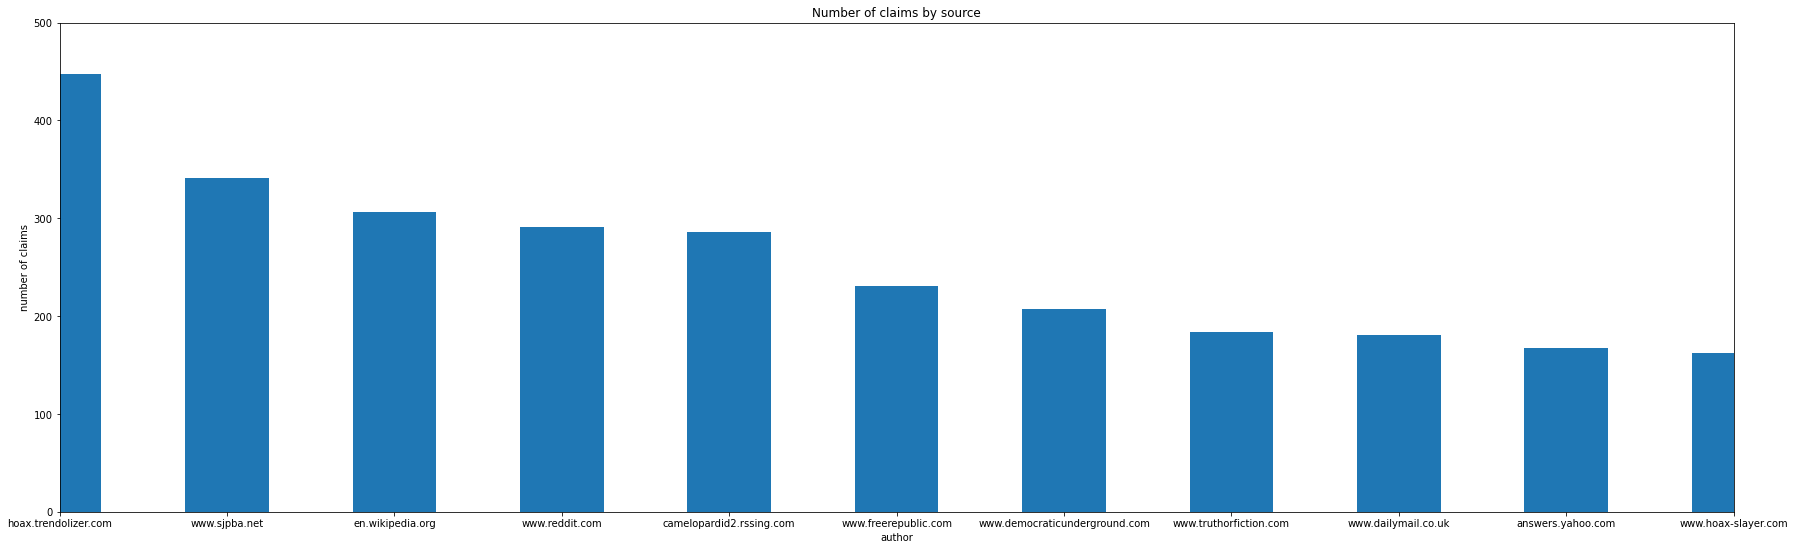

In [31]:
# Define plot space
fig, ax = plt.subplots(figsize=(30, 9))
# Define x and y axes
ax.bar(stat.index, stat.values, align='center', width=0.50)
# Set plot title and axes labels
ax.set(title = "Number of claims by source")
ax.set_xlabel("author")
ax.set_ylabel("number of claims")
ax.set_xlim(0, 10)
ax.set_ylim(0, 500)
plt.show()